<a href="https://colab.research.google.com/github/sravanirachamalla/Group-7/blob/main/Copy_of_BDA_G6_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PySpark is the Python API written in python to support Apache Spark. Apache Spark is a distributed framework that can handle Big Data analysis. Spark is written in Scala and can be integrated with Python, Scala, Java, R, SQL languages. Spark is basically a computational engine, that works with huge sets of data by processing them in parallel and batch systems.

Installation of Pyspark

Spark Session :
This is the entry point to the programming spark with Dataframe API & dataset. That allows you to perform various tasks using spark. spark context, hive context, SQL context, now all of it is encapsulated in the session. Before spark 2.0, sparkContext was used to access all spark functionality. The spark driver program uses sparkContext to connect to the cluster through a resource manager. sparkConf creates the sparkContext object, which stores configuration parameter like appName (to identify your spark driver), application, number of core, and memory size of executor running on the worker node. After spark 2.0 onwards these two features are encapsulated in spark session. So each time you want to perform tasks using spark you need to create a session and after execution, you must end the session.

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Grp Project').getOrCreate()
spark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 66.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=bf09178841286b32e1a371af1eb502ee392417e15b4cada9c6fcfb90d8b38a9d
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


First, import the libraries. Then give the path of Spark binaries present in your system.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now read the data set using read.csv() you can allow the spark to read the dataset and to execute when it is required.

In [4]:
df=spark.read.csv(r'/content/kc_house_data.csv',header=True,inferSchema=True)

#Data Exploration

In [5]:
# To show the datatypes and null values of the columns
df.show(5,True)
df.printSchema()

+----------+----------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|      date|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+----------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|10/13/2014|221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192| 12/9/2014|538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951|        1991|  9812

In [6]:
# To show the summary statistics of all thecolumns
df.describe().show()

+-------+-------------------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+
|summary|                 id|     date|            price|          bedrooms|         bathrooms|       sqft_living|          sqft_lot|            floors|          waterfront|               view|         condition|            grade|        sqft_above|     sqft_basement|          yr_built|      yr_renovated|          zipcode|               lat|               long|     sqft_living15|        sqft_lot15|
+-------+-------------------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+---

In [7]:
#To show the no. of rows and columns in the dataset
df.count(),len(df.columns)

(21597, 21)

In [8]:
#To show all the columns present in the dataset
df.columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

If you look at the schema of the dataset, it is in the string format. Lets typecast to float.

In [9]:
#selecting the grade column, grouping them based on its count
df.select('grade').groupby('grade').count().show() 

+-----+-----+
|grade|count|
+-----+-----+
|   12|   89|
|   13|   13|
|    6| 2038|
|    3|    1|
|    5|  242|
|    9| 2615|
|    4|   27|
|    8| 6065|
|    7| 8974|
|   10| 1134|
|   11|  399|
+-----+-----+



In [10]:
#importing required functions
from pyspark.sql.functions import col, explode, array, lit

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7345d44610>]],
      dtype=object)

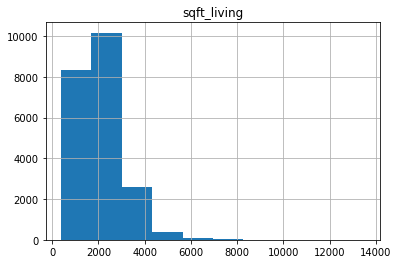

In [11]:
#selecting the sqft_living and plotting the histogram to know how the values are arranged 
df.select('sqft_living').toPandas().hist()

In [12]:
#to show the summary statistics of the sqft_living column
df.describe('sqft_living').show() 

+-------+------------------+
|summary|       sqft_living|
+-------+------------------+
|  count|             21597|
|   mean|2080.3218502569803|
| stddev| 918.1061250800816|
|    min|               370|
|    max|             13540|
+-------+------------------+



Let’s check for null values.

In [13]:
for i in df.columns:
    print('null value count for {} is'.format(df[i]),df.filter(df[i].isNull()).count())

null value count for Column<'id'> is 0
null value count for Column<'date'> is 0
null value count for Column<'price'> is 0
null value count for Column<'bedrooms'> is 0
null value count for Column<'bathrooms'> is 0
null value count for Column<'sqft_living'> is 0
null value count for Column<'sqft_lot'> is 0
null value count for Column<'floors'> is 0
null value count for Column<'waterfront'> is 0
null value count for Column<'view'> is 0
null value count for Column<'condition'> is 0
null value count for Column<'grade'> is 0
null value count for Column<'sqft_above'> is 0
null value count for Column<'sqft_basement'> is 0
null value count for Column<'yr_built'> is 0
null value count for Column<'yr_renovated'> is 0
null value count for Column<'zipcode'> is 0
null value count for Column<'lat'> is 0
null value count for Column<'long'> is 0
null value count for Column<'sqft_living15'> is 0
null value count for Column<'sqft_lot15'> is 0


Great! there are no null values present. 

In [14]:
#selecting the waterfront column, grouping them based on its count
df.select('waterfront').groupby('waterfront').count().show()

+----------+-----+
|waterfront|count|
+----------+-----+
|         1|  163|
|         0|21434|
+----------+-----+



In [16]:
#groupby grade and showed their respective average sqft_living
df.groupby('grade').agg({'sqft_living': 'mean'}).show()

+-----+------------------+
|grade|  avg(sqft_living)|
+-----+------------------+
|   12|5479.0224719101125|
|   13| 7483.076923076923|
|    6|1191.5613346418056|
|    3|             520.0|
|    5| 983.3264462809917|
|    9|2868.1399617590823|
|    4| 680.7407407407408|
|    8| 2184.803627370157|
|    7|1689.5149320258524|
|   10| 3520.299823633157|
|   11| 4395.448621553885|
+-----+------------------+



In [15]:
#Groupby grade and showing it
df.groupby('grade').count().show()

+-----+-----+
|grade|count|
+-----+-----+
|   12|   89|
|   13|   13|
|    6| 2038|
|    3|    1|
|    5|  242|
|    9| 2615|
|    4|   27|
|    8| 6065|
|    7| 8974|
|   10| 1134|
|   11|  399|
+-----+-----+



#Scatter Matrix
It is a great way to roughly determine if we have a linear correlation between multiple independent variables

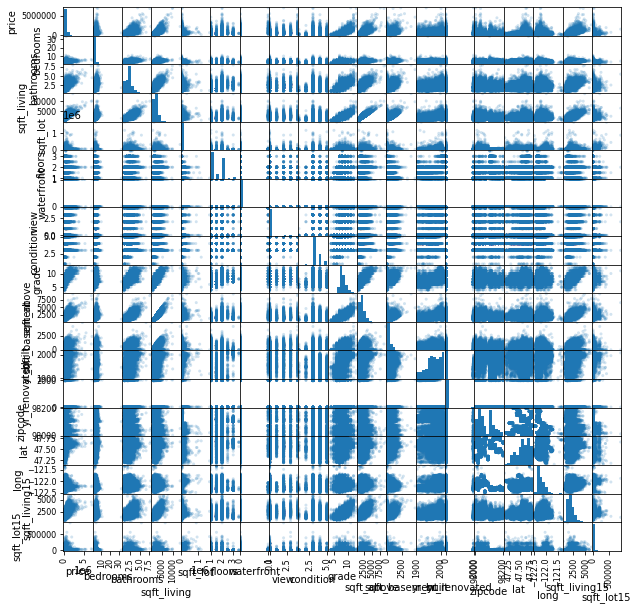

In [28]:
#Importing important libraries for performing different statistical functions
import pandas as pd
import matplotlib.pyplot as plt
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df.select(numeric_features).sample(False, 0.8).toPandas()
from pandas.plotting import scatter_matrix
scatter_matrix(sampled_data, alpha=0.2, figsize=(10, 10))
n = len(sampled_data.columns)
plt.show()

Its hard to see.Lets find the correlation between independent variables and the target variable

#Correlation Matrix

In [29]:
#Showing the correlation matrix between grade and sqft_living
from pyspark.mllib.stat import Statistics

# select variables to check correlation
df_features = df.select("grade","sqft_living") 

# create RDD table for correlation calculation
rdd_table = df_features.rdd.map(lambda row: row[0:])

# get the correlation matrix
corr_mat=Statistics.corr(rdd_table, method="pearson")
corr_mat

#The correlation coefficient ranges from -1 to +1, as it is close to 1 which means it has a strong positive correlation  

array([[1.        , 0.76277905],
       [0.76277905, 1.        ]])

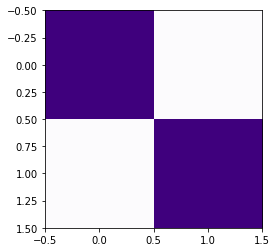

In [30]:
#plotting the correlation matrix
import matplotlib.pyplot as plt
plt.imshow(corr_mat,cmap='Purples')

In [31]:
colm = ['No','X1 transaction date']
df =df.select([column for column in df.columns if column not in colm])

In [32]:
# To show the datatypes and null values of the columns
df.show(5,True)
df.printSchema()

+----------+----------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|      date|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+----------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|10/13/2014|221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192| 12/9/2014|538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951|        1991|  9812

In [33]:
from pyspark.sql.functions import col, count, isnan, when
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

DataFrame[id: bigint, date: bigint, price: bigint, bedrooms: bigint, bathrooms: bigint, sqft_living: bigint, sqft_lot: bigint, floors: bigint, waterfront: bigint, view: bigint, condition: bigint, grade: bigint, sqft_above: bigint, sqft_basement: bigint, yr_built: bigint, yr_renovated: bigint, zipcode: bigint, lat: bigint, long: bigint, sqft_living15: bigint, sqft_lot15: bigint]

In [34]:
# To show the datatypes and null values of the columns
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [35]:
#To show all the rows and columns in the dataset
df.show()

+----------+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|      date|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|10/13/2014| 221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192| 12/9/2014| 538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951|        1991| 

In [36]:
#As we dont want irrelevant data, we are dropping price and data columns 
features = df.drop('Price','date')

Now we will do split to get Features and Label columns.

# Vector Assembler

VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models.

In [37]:
from pyspark.ml.feature import VectorAssembler
#let's assemble our features together using vectorAssembler
assembler = VectorAssembler(
    inputCols=features.columns,
    outputCol="features")

output = assembler.transform(df).select('features','Price')

In [38]:
output = assembler.transform(df).select('features','Price')

This will transform the target and features columns. Now we will split it into train and test dataset.

In [39]:
#splitting the train and test data into 80 and 20% respectively
train,test = output.randomSplit([0.8, 0.2])

In [40]:
#To show the train data from the dataset
train.show()

+--------------------+--------+
|            features|   Price|
+--------------------+--------+
|[1000102.0,6.0,3....|280000.0|
|[1200019.0,4.0,1....|647500.0|
|[1200021.0,3.0,1....|400000.0|
|[2800031.0,3.0,1....|235000.0|
|[3600057.0,4.0,2....|402500.0|
|[3800008.0,5.0,1....|178000.0|
|[5200087.0,4.0,2....|487000.0|
|[6200017.0,3.0,1....|281000.0|
|[7200080.0,4.0,2....|239000.0|
|[7200179.0,2.0,1....|150000.0|
|[7200179.0,2.0,1....|175000.0|
|[7400062.0,2.0,1....|299800.0|
|[7600065.0,3.0,2....|465000.0|
|[7600136.0,2.0,2....|411000.0|
|[9000025.0,2.0,1....|496000.0|
|[1.12004E7,3.0,2....|617000.0|
|[1.130012E7,3.0,2...|635000.0|
|[1.150024E7,3.0,2...|872750.0|
|[1.150089E7,3.0,2...|843000.0|
|[1.150116E7,5.0,2...|837700.0|
+--------------------+--------+
only showing top 20 rows



In [41]:
#To show the test data from the dataset
test.show()

+--------------------+---------+
|            features|    Price|
+--------------------+---------+
|[1000102.0,6.0,3....| 300000.0|
|[3600072.0,4.0,2....| 680000.0|
|[7600057.0,3.0,2....| 520000.0|
|[7600125.0,5.0,1....| 630000.0|
|[1.120007E7,3.0,2...| 570000.0|
|[1.120029E7,3.0,2...| 546000.0|
|[1.150133E7,3.0,3...| 795000.0|
|[1.152003E7,4.0,2...| 640000.0|
|[1.15202E7,4.0,2....| 750000.0|
|[1.3002495E7,3.0,...| 295000.0|
|[1.60002E7,3.0,2....| 250000.0|
|[1.6000435E7,2.0,...| 218500.0|
|[2.350022E7,5.0,2...| 550120.0|
|[2.352019E7,3.0,1...| 490000.0|
|[3.400154E7,2.0,1...| 573300.0|
|[4.2000006E7,5.0,...| 235000.0|
|[4.2000245E7,4.0,...| 171000.0|
|[4.610035E7,5.0,3...|1730000.0|
|[4.6100504E7,4.0,...|2030000.0|
|[6.500021E7,2.0,1...| 471000.0|
+--------------------+---------+
only showing top 20 rows



# Linear Regression model

Regression models predict a value of the Y variable given known values of the X variables. Prediction within the range of values in the dataset used for model-fitting is known informally as interpolation. Prediction outside this range of the data is known as extrapolation.

In [42]:
from pyspark.ml.regression import LinearRegression
lin_reg = LinearRegression(featuresCol = 'features', labelCol='Price')
linear_model = lin_reg.fit(train)

In [43]:
#To print X and y coefficients and intercept
print("Coefficients: " + str(linear_model.coefficients))
print("\nIntercept: " + str(linear_model.intercept))

Coefficients: [-1.5545566584516378e-06,-34384.269311415745,39129.887609650475,84.80090534649104,0.1641616073165643,10380.752392901239,563530.5705281945,52588.266886046054,25452.37945970446,100184.97910664452,85.66582281919177,63.819780370131305,-2673.930289170439,21.0968144234485,-558.2794262978327,599523.6416841393,-198563.19163614383,24.085822783927643,-0.4384202343287065]

Intercept: 6543508.567312438


The coefficients for each column and Intercept we got.

In [44]:
#To print the RMSE and r^2 of trained dataset
trainSummary = linear_model.summary
print("RMSE: %f" % trainSummary.rootMeanSquaredError)
print("\nr2: %f" % trainSummary.r2)

RMSE: 197404.142469

r2: 0.705193


For testing dataset

In [45]:
from  pyspark.sql.functions import abs
predictions = linear_model.transform(test)
x =((predictions['Price']-predictions['prediction'])/predictions['Price'])*100
predictions = predictions.withColumn('Accuracy',abs(x))
predictions.select("prediction","Price","Accuracy","features").show()

+------------------+---------+------------------+--------------------+
|        prediction|    Price|          Accuracy|            features|
+------------------+---------+------------------+--------------------+
| 314154.8352257032| 300000.0| 4.718278408567731|[1000102.0,6.0,3....|
| 543998.6530096373| 680000.0| 20.00019808681805|[3600072.0,4.0,2....|
| 582097.5772487978| 520000.0|11.941841778614952|[7600057.0,3.0,2....|
| 719707.5956909833| 630000.0| 14.23930090333069|[7600125.0,5.0,1....|
| 475654.3095477186| 570000.0|16.551875517944104|[1.120007E7,3.0,2...|
|  476443.961615338| 546000.0|12.739201169352016|[1.120029E7,3.0,2...|
|1046935.5009716181| 795000.0|31.690000122216116|[1.150133E7,3.0,3...|
| 731862.6642828211| 640000.0|  14.3535412941908|[1.152003E7,4.0,2...|
|  840126.575687916| 750000.0|12.016876758388802|[1.15202E7,4.0,2....|
|  538238.764602704| 295000.0| 82.45381850939117|[1.3002495E7,3.0,...|
|490455.01108385343| 250000.0| 96.18200443354137|[1.60002E7,3.0,2....|
| 3359

For r — square value for the test dataset

In [46]:
from pyspark.ml.evaluation import RegressionEvaluator
pred_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Price",metricName="r2")
print("R Squared (R2) on test data = %g" % pred_evaluator.evaluate(predictions))

R Squared (R2) on test data = 0.680909


As the r square value which is 0.69 for the test dataset, which represents that approximately 69% of the variability can be explained in this model

As the trained and test data of the dataset has similar r-square value the prediction is accurate and thus have minimum errors.                             
Let’s now check for adjusted R square.

Adjusted R — square

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. We use Adjusted R2 value which penalizes excessive use of such features that do not correlate with the output data.

In [47]:
def adj_r2(x):
    r2 = trainSummary.r2
    n = df.count()
    p = len(df.columns)
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(train)

0.7049061020369216

In [48]:
adj_r2(test)

0.7049061020369216

**We got adjusted r squared value 0.70 for training and testing.**                      
As the adjusted R-squared increased,the new term improves the model more than would be expected.

#More analysis done through Linear Regression

In [49]:
lin_reg = LinearRegression(featuresCol = 'features', labelCol='Price',maxIter=50, regParam=0.12, elasticNetParam=0.2)
linear_model = lin_reg.fit(train)

In [50]:
linear_model.summary.rootMeanSquaredError

197404.14246926465

In [51]:
features_rdd = features.rdd.map(lambda row: row[0:])

In [52]:
features_rdd.collect()

[(7129300520,
  3,
  1.0,
  1180,
  5650,
  1.0,
  0,
  0,
  3,
  7,
  1180,
  0,
  1955,
  0,
  98178,
  47.5112,
  -122.257,
  1340,
  5650),
 (6414100192,
  3,
  2.25,
  2570,
  7242,
  2.0,
  0,
  0,
  3,
  7,
  2170,
  400,
  1951,
  1991,
  98125,
  47.721,
  -122.319,
  1690,
  7639),
 (5631500400,
  2,
  1.0,
  770,
  10000,
  1.0,
  0,
  0,
  3,
  6,
  770,
  0,
  1933,
  0,
  98028,
  47.7379,
  -122.233,
  2720,
  8062),
 (2487200875,
  4,
  3.0,
  1960,
  5000,
  1.0,
  0,
  0,
  5,
  7,
  1050,
  910,
  1965,
  0,
  98136,
  47.5208,
  -122.393,
  1360,
  5000),
 (1954400510,
  3,
  2.0,
  1680,
  8080,
  1.0,
  0,
  0,
  3,
  8,
  1680,
  0,
  1987,
  0,
  98074,
  47.6168,
  -122.045,
  1800,
  7503),
 (7237550310,
  4,
  4.5,
  5420,
  101930,
  1.0,
  0,
  0,
  3,
  11,
  3890,
  1530,
  2001,
  0,
  98053,
  47.6561,
  -122.005,
  4760,
  101930),
 (1321400060,
  3,
  2.25,
  1715,
  6819,
  2.0,
  0,
  0,
  3,
  7,
  1715,
  0,
  1995,
  0,
  98003,
  47.3097,
  -122

#Gradient boosted tree regression

In [56]:
from pyspark.ml.regression import GBTRegressor
gbt= GBTRegressor(featuresCol='features',labelCol='Price',maxIter=10)
gbt_model=gbt.fit(train)
gbt_predictions=gbt_model.transform(test)
gbt_predictions.select('prediction','Price','features').show(5)

+-----------------+--------+--------------------+
|       prediction|   Price|            features|
+-----------------+--------+--------------------+
|319732.0650203281|300000.0|[1000102.0,6.0,3....|
|616891.7914310964|680000.0|[3600072.0,4.0,2....|
|456154.0280500776|520000.0|[7600057.0,3.0,2....|
|743072.1514508128|630000.0|[7600125.0,5.0,1....|
|521100.1848435345|570000.0|[1.120007E7,3.0,2...|
+-----------------+--------+--------------------+
only showing top 5 rows



In [59]:
gbt_evaluator=RegressionEvaluator(labelCol='Price',predictionCol='prediction', metricName='rmse')
rmse=gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Square Error(RMSE) on test data=%g" %rmse)

Root Mean Square Error(RMSE) on test data=181407


In [ ]:
##RMSE on test data =181407, 
#The Gradient-boosted tree regression performed the best on our data